In [6]:
import sys; sys.path.insert(0, '.')
import visual
visual.display_meta_info()


| Meta          | Value          |
|:------------- | --------------:|
| Git revision  | bfecb3d |
| System        | Linux (5.16.12-200.fc35.x86_64)           |
| Processor     | Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz          |
| Memory        | 16 GB          |


***Mean over 10 invocations.***

| malloc | description |
|:--- |:--- |
|**buddy**|Buddy allocator (MallocKit)|
|**hd**|Hoard|
|**hoard**|Hoard (MallocKit)|
|**mi**|MiMalloc|
|**sys**|System alloctor|


malloc,buddy,hd,hoard,mi,sys
bench,,,,,
alloc-test,1.202616,1.0,1.086754,0.950544,1.205004
alloc-test1,1.139333,1.0,1.065286,0.943445,1.190256
barnes,0.997754,1.0,0.991555,0.990508,0.993282
cache-scratch,1.001426,1.0,1.000197,0.999806,0.999548
cache-scratch1,1.000397,1.0,1.005879,1.001842,1.004964
cfrac,1.179402,1.0,1.023199,0.968399,1.05348
espresso,1.313281,1.0,1.004171,0.981405,1.115834
glibc-simple,2.126938,1.0,1.085477,0.937232,2.041162
glibc-thread,0.999494,1.0,0.999407,0.999387,0.999306


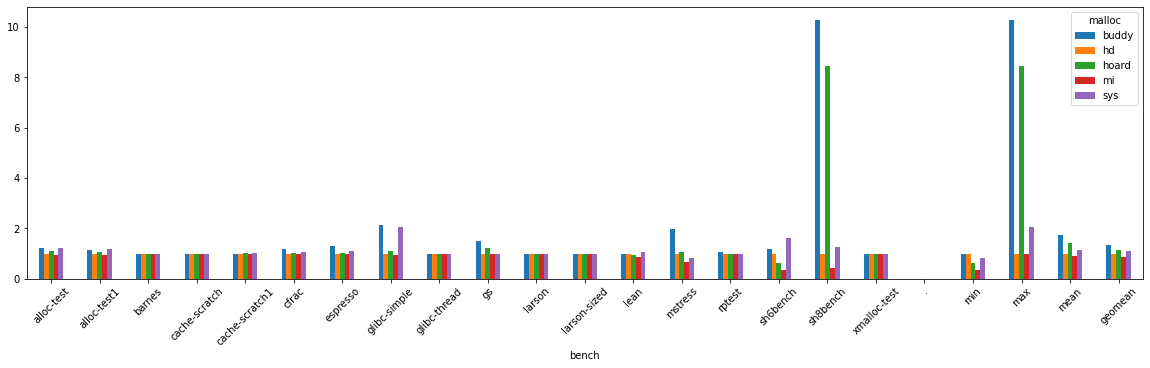

In [20]:
from visual import Pipeline

data = Pipeline.load_results()
data, invocations = Pipeline.mean_over_invocation(data)
data = Pipeline.normalize(data, baseline = 'hd')
data = Pipeline.plot_bar(data, series='malloc', pivot='bench', value='duration_time')

visual.markdown(f'***Mean over {invocations} invocations.***')
algorithms = '| malloc | description |\n|:--- |:--- |\n'
for a in data.columns.values:
    if a == 'buddy': algorithms += f'|**{a}**|Buddy allocator (MallocKit)|\n'
    elif a == 'hd': algorithms += f'|**{a}**|Hoard|\n'
    elif a == 'hoard': algorithms += f'|**{a}**|Hoard (MallocKit)|\n'
    elif a == 'mi': algorithms += f'|**{a}**|MiMalloc|\n'
    elif a == 'sys': algorithms += f'|**{a}**|System alloctor|\n'
visual.markdown(algorithms)

data